In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('log_niginx_labeled.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

host  method  endpoint  protocol  status  content_size  time
0      152       4       236         5       6            12  1614
1      234       4        10         5       0            48  1616
2      662       4       400         5       7             7  1617
3      662       4       177         5       0            14  1617
4      338       4        40         5       7            15  1619
...    ...     ...       ...       ...     ...           ...   ...
5731   172       7       240         5       7             7  2460
5732   172       4       240         5       7             7  2461
5733   172       7        10         5       8             8  2462
5734   172       7       240         5       7             7  2463
5735   352       4        10         5       0            48  2466

[5736 rows x 7 columns]

In [3]:
#Protocol still have some null values
df['protocol'].isna().value_counts()

False    5736
Name: protocol, dtype: int64

## Anomaly Detection Using Pycaret
### PyCaret’s Anomaly Detection Module is an unsupervised machine learning module that is used for identifying rare items, events or observations which raise suspicions by differing significantly from the majority of the data. 

### Typically, the anomalous items will translate to some kind of problem such as bank fraud, a structural defect, medical problems or errors . 

### This module provide several pre-processing features that prepares the data for modeling through setup function. 

### This module has over 12 ready-to-use algorithms and several plots to analyze the results of trained models.

#pip install --pre pycaret

In [4]:
from pycaret.anomaly import *

In [5]:
#intialize the setup
exp_ano = setup(df)

# Creating iforest model

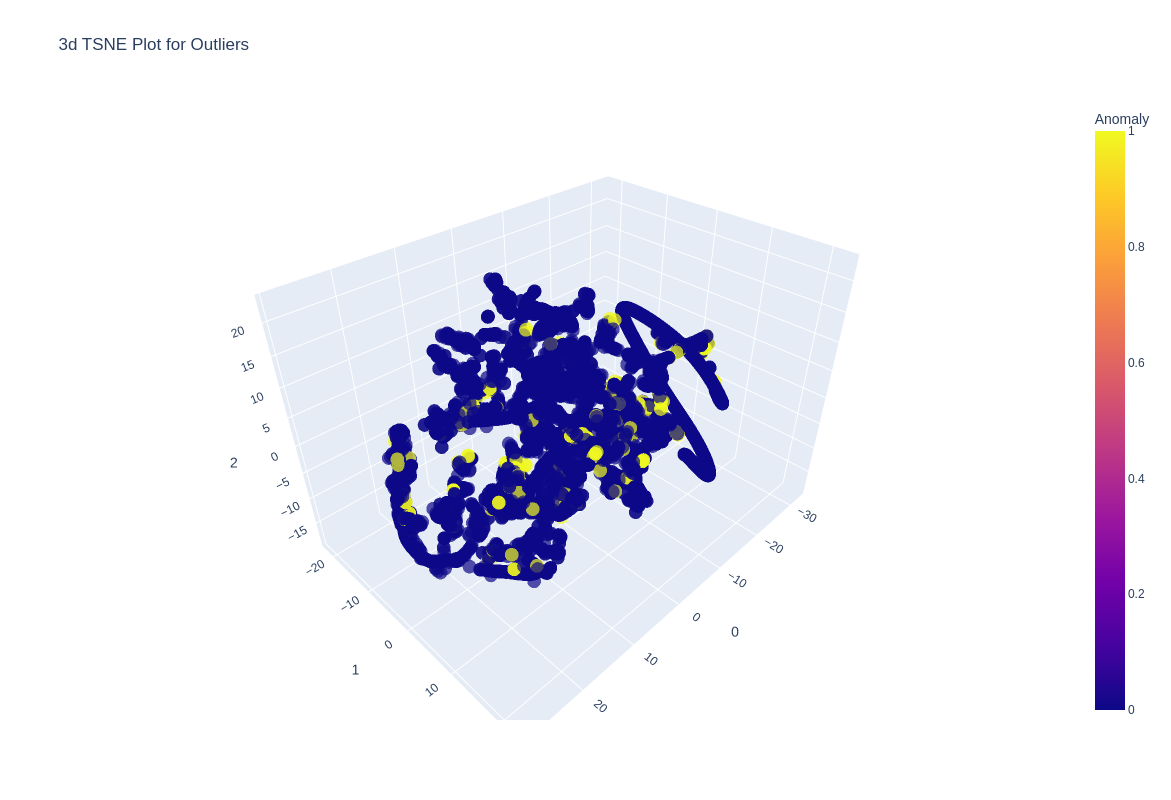

In [6]:
iforest=create_model('iforest')
## plotting a model
plot_model(iforest)

In [7]:
models()

Name  \
ID                                             
abod            Angle-base Outlier Detection   
cluster       Clustering-Based Local Outlier   
cof         Connectivity-Based Local Outlier   
iforest                     Isolation Forest   
histogram  Histogram-based Outlier Detection   
knn             K-Nearest Neighbors Detector   
lof                     Local Outlier Factor   
svm                   One-class SVM detector   
pca             Principal Component Analysis   
mcd           Minimum Covariance Determinant   
sod               Subspace Outlier Detection   
sos             Stochastic Outlier Selection   

                                          Reference  
ID                                                   
abod                          pyod.models.abod.ABOD  
cluster                     pyod.models.cblof.CBLOF  
cof        pycaret.internal.patches.pyod.COFPatched  
iforest                 pyod.models.iforest.IForest  
histogram                     pyod.models.hbos.HBOS  
knn                             pyod.models.knn.KNN  
lof                             pyod.models.lof.LOF  
svm                         pyod.models.ocsvm.OCSVM  
pca                             pyod.models.pca.PCA  
mcd                             pyod.models.mcd.MCD  
sod        pycaret.internal.patches.pyod.SODPatched  
sos        pycaret.internal.patches.pyod.SOSPatched

2023-03-12 01:24:58.365895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 01:25:03.922296: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-12 01:25:03.922346: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-12 01:25:15.234532: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

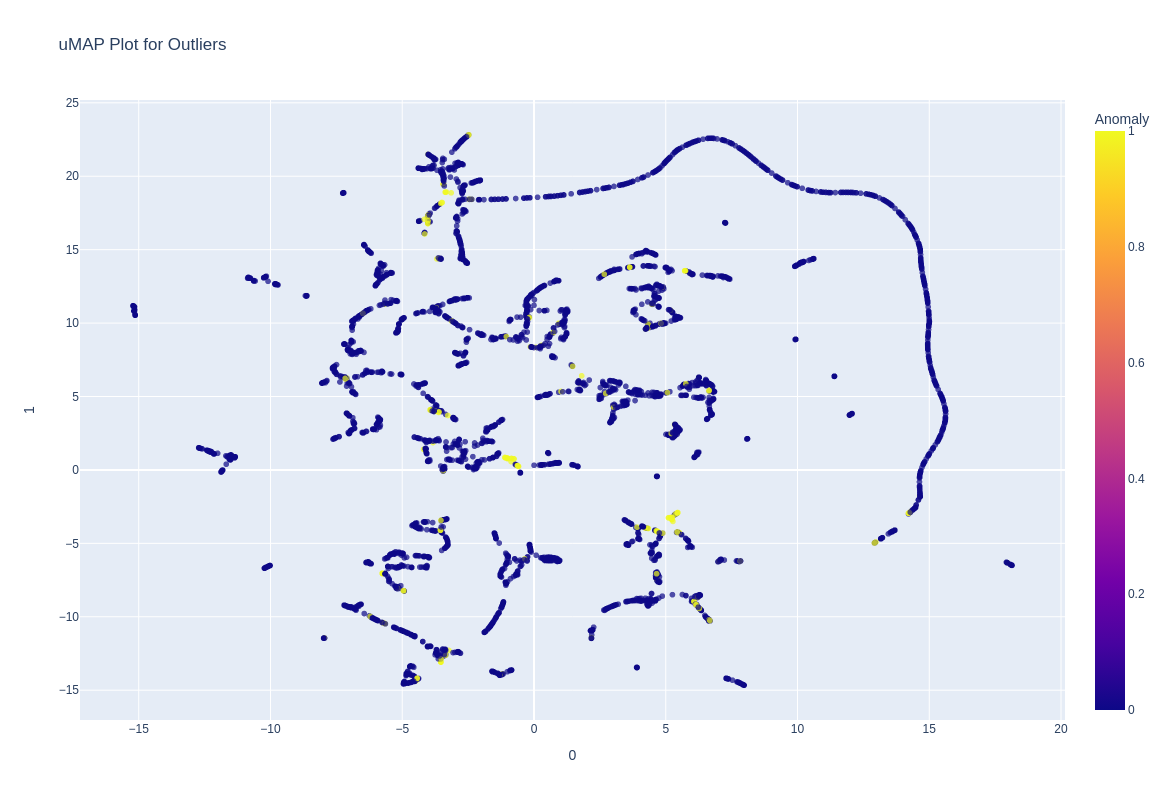

In [8]:
plot_model(iforest, plot = 'umap')

In [9]:
result_iforest = assign_model(iforest)
result_iforest.head()

host  method  endpoint  protocol  status  content_size  time  Anomaly  \
0   152       4       236         5       6            12  1614        0   
1   234       4        10         5       0            48  1616        0   
2   662       4       400         5       7             7  1617        0   
3   662       4       177         5       0            14  1617        0   
4   338       4        40         5       7            15  1619        0   

   Anomaly_Score  
0      -0.099227  
1      -0.119649  
2      -0.046752  
3      -0.113277  
4      -0.076019

# Generate predictions using trained model(iforest)

In [10]:
iforest_predictions = predict_model(iforest, data = df)

In [11]:
iforest_predictions['Anomaly'].value_counts()

0    5449
1     287
Name: Anomaly, dtype: int64

In [12]:
iforest_predictions[iforest_predictions['Anomaly']==1]

host  method  endpoint  protocol  status  content_size    time  \
10    428.0     0.0       0.0      22.0     6.0           0.0  1649.0   
11    428.0     0.0       0.0      22.0     6.0           0.0  1650.0   
12    428.0     0.0       0.0      22.0     6.0           0.0  1651.0   
13    428.0     0.0       0.0      22.0     6.0           0.0  1652.0   
18    428.0     0.0       0.0      22.0     6.0           8.0  1657.0   
...     ...     ...       ...       ...     ...           ...     ...   
5706  381.0     0.0       0.0      22.0     6.0           8.0  2395.0   
5708  731.0    10.0     571.0      22.0     6.0           8.0  2403.0   
5709  731.0    10.0     571.0      22.0     6.0           8.0  2404.0   
5730  172.0     7.0      10.0       5.0     8.0           8.0  2459.0   
5733  172.0     7.0      10.0       5.0     8.0           8.0  2462.0   

      Anomaly  Anomaly_Score  
10          1       0.043314  
11          1       0.043314  
12          1       0.043314  
13          1       0.043314  
18          1       0.037036  
...       ...            ...  
5706        1       0.045452  
5708        1       0.079343  
5709        1       0.079343  
5730        1       0.000144  
5733        1       0.000144  

[287 rows x 9 columns]

# creating KNN model

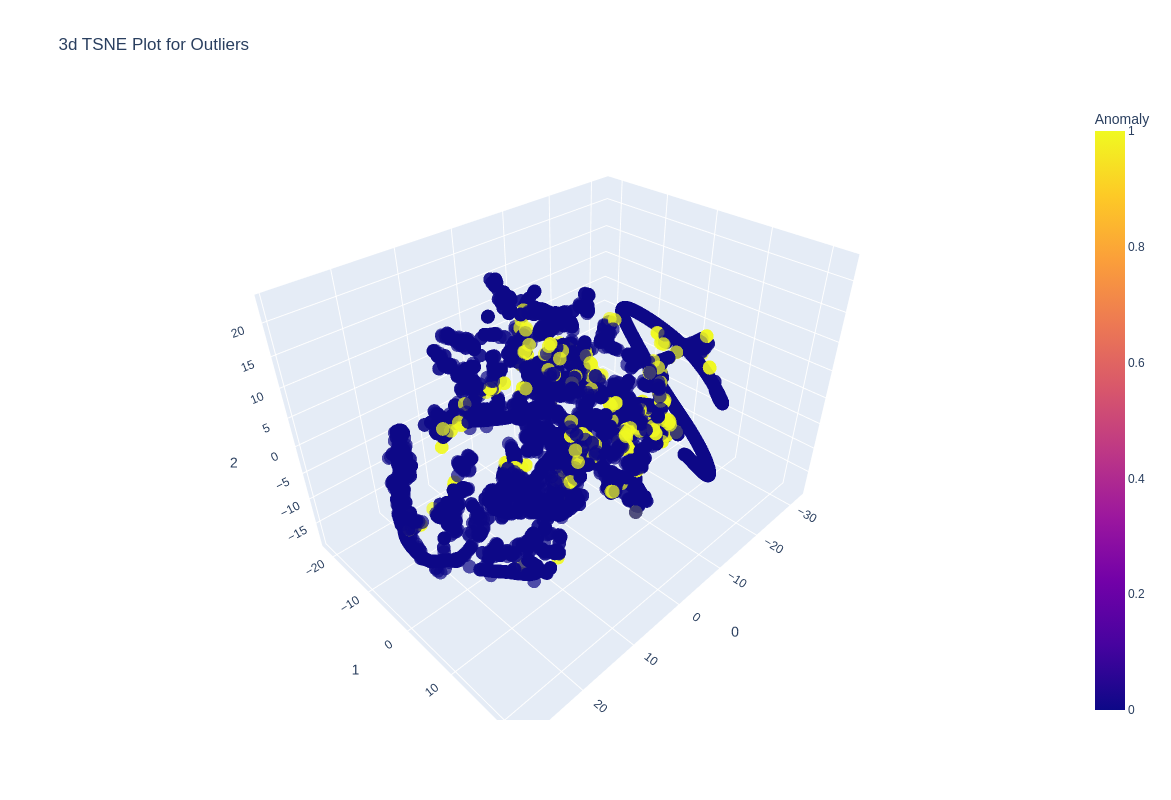

In [13]:
knn=create_model('knn')
## plotting a model
plot_model(knn)

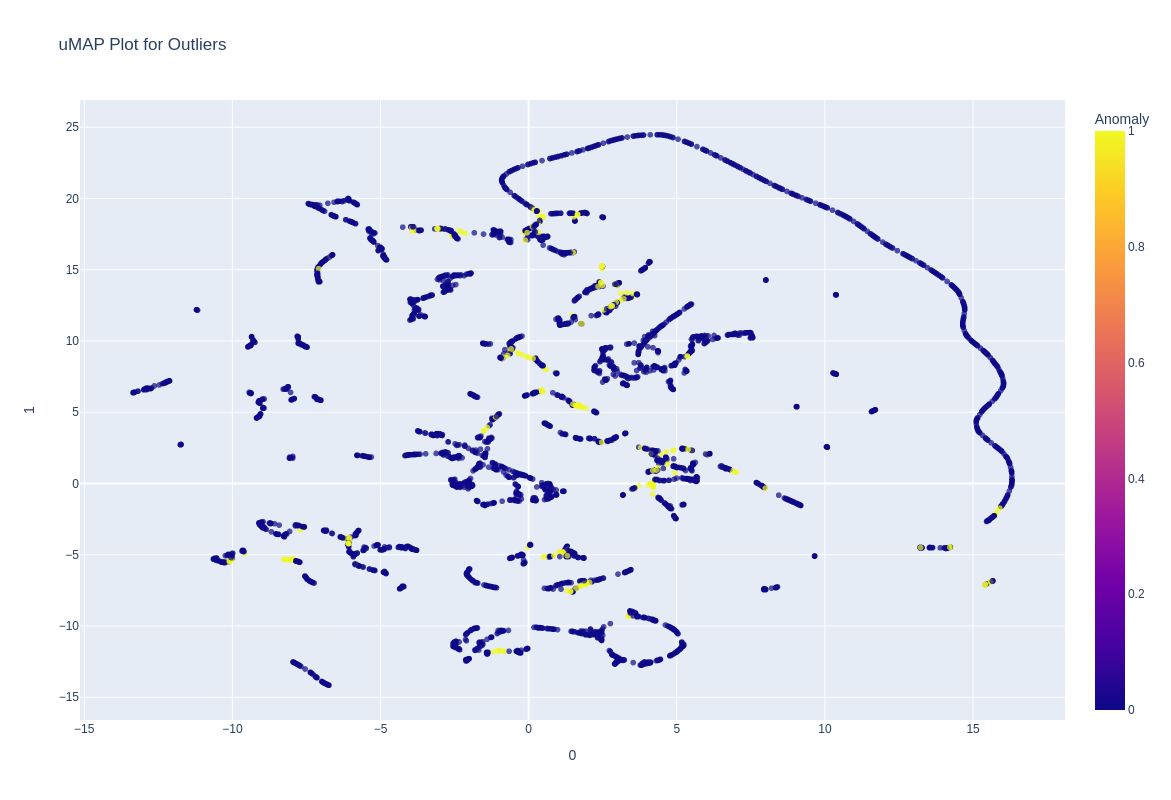

In [14]:
plot_model(knn, plot = 'umap')

In [75]:
result_knn = assign_model(knn)
result_knn['Anomaly'].value_counts()

host  method  endpoint  protocol  status  content_size  time  Anomaly  \
0   152       4       236         5       6            12  1614        0   
1   234       4        10         5       0            48  1616        0   
2   662       4       400         5       7             7  1617        1   
3   662       4       177         5       0            14  1617        0   
4   338       4        40         5       7            15  1619        0   

   Anomaly_Score  
0      37.563280  
1      49.839743  
2     153.434025  
3      96.332757  
4      57.835975

# Generate predictions using trained model(knn)

In [62]:
knn_predictions = predict_model(knn, data = df)

In [63]:
knn_predictions['Anomaly'].value_counts()

0    5511
1     225
Name: Anomaly, dtype: int64

In [65]:
knn_predictions[knn_predictions['Anomaly']==1]

host  method  endpoint  protocol  status  content_size    time  \
2     662.0     4.0     400.0       5.0     7.0           7.0  1617.0   
14    428.0     4.0     400.0       5.0     7.0           7.0  1653.0   
15    428.0     4.0     417.0       5.0     7.0           7.0  1654.0   
23    610.0     4.0     285.0       5.0     0.0          52.0  1667.0   
24    610.0     4.0     265.0       5.0     0.0          15.0  1667.0   
...     ...     ...       ...       ...     ...           ...     ...   
5669  406.0    10.0     571.0      22.0     6.0           8.0  2292.0   
5670  406.0    10.0     571.0      22.0     6.0           8.0  2292.0   
5683  316.0     4.0     400.0       5.0     7.0          15.0  2322.0   
5686  471.0     4.0     177.0       5.0     0.0          14.0  2326.0   
5694  614.0     4.0     177.0       5.0     0.0          14.0  2348.0   

      Anomaly  Anomaly_Score  
2           1     143.188687  
14          1     168.600119  
15          1     158.641104  
23          1     129.359963  
24          1     113.793673  
...       ...            ...  
5669        1     121.416638  
5670        1     121.416638  
5683        1     136.766224  
5686        1     116.786129  
5694        1     138.202750  

[225 rows x 9 columns]

In [15]:
save_model(knn, 'knn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['host', 'method', 'endpoint',
                                              'protocol', 'status',
                                              'content_size', 'time'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
   metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
   radius=1.0))]),
 'knn_model.pkl')